In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as ss
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [2]:
#Считываем данные и приводим их к формату даты
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'])
olist_orders['order_delivered_carrier_date'] = pd.to_datetime(olist_orders['order_delivered_carrier_date'])
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [32]:
#Считываем данные и приводим их к формату даты
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items['shipping_limit_date'] = pd.to_datetime(olist_order_items['shipping_limit_date'])
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа.

В рамках задачи будем:

- Исследовать данные и определять, какой вид заказа будет учитываться в retention.
- Строить месячный retention.
- Для примера найдём, чему равен медианный retention 1го месяца и когорту с самым высоким retention на 3й месяц.

In [4]:
#Готовим данные
df = olist_orders.query('order_status == "delivered"').merge(olist_customers[['customer_id', 'customer_unique_id']], on = 'customer_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


In [5]:
#Извлекаем месяцы и дни для расчёта ретеншена
df['order_period'] = df['order_purchase_timestamp'].dt.to_period('M')
df['order_period_day'] = df['order_purchase_timestamp'].dt.to_period('D')

In [6]:
#Присваиваем когорты
df['cohort'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df['cohort_day'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_period,order_period_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02-13,2018-02,2018-02-13


In [7]:
#Рассчитываем номер месячного периода в днях
df['period_number_month'] = np.floor((df.order_period_day - df.cohort_day).apply(attrgetter('n')) / 30)

In [8]:
#Агрегируем данные по когортам и номеру месячного периода
df_cohort = df.groupby(['cohort', 'period_number_month']).agg(n_customers = ('customer_unique_id', 'nunique')).reset_index()
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [9]:
#Создаём сводную таблицу когорт
cohort_pivot = df_cohort.pivot(index = 'cohort', columns = 'period_number_month', values = 'n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Рассчитываем размеры когорт
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [11]:
#Рассчитываем retention
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(f'Медианный retention 1-го месяца: {round(retention_matrix.iloc[:, 1].median(), 4)}')

Медианный retention 1-го месяца: 0.0035


In [34]:
print(f'Когорта с самым высоким retention на 3-й месяц: {retention_matrix.iloc[:, 3].idxmax()}')

Когорта с самым высоким retention на 3-й месяц: 2017-01


# Задача 2. Определить, существует ли product/market fit у маркетплейса.

В рамках задачи будем:

- Оценивать наличие product/market fit у продукта с помощью когортного анализа, полученного на предыдущем этапе.
- Посмотрим, на чём маркетплейс должен сконцентрироваться в ближайшее время. Определим наличие PMF и сделаем предварительные выводы.

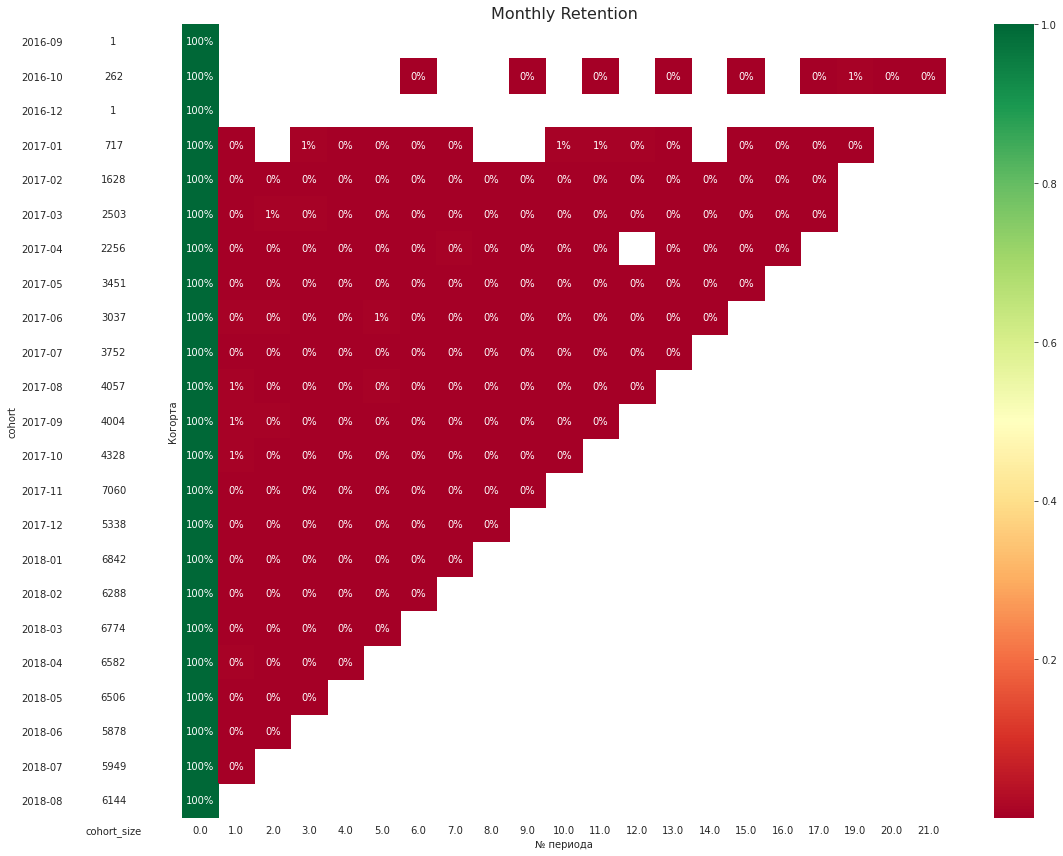

In [14]:
#Построим тепловую карту когортн рассчитанного ранее retention
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize = (16, 12), sharey = True, gridspec_kw = {'width_ratios': [1, 11]})

    #Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix, mask = retention_matrix.isnull(), annot = True, fmt = '.0%', cmap = 'RdYlGn', ax = ax[1])
    ax[1].set_title('Monthly Retention', fontsize = 16)
    ax[1].set(xlabel = '№ периода', ylabel = 'Когорта')
    
    #Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, annot = True, cbar = False, fmt = 'g', cmap = white_cmap, ax = ax[0])
    
    fig.tight_layout()
    plt.show()

In [15]:
#Исходя из вышеуказанного, масштабировать проект ещё очень рано. Возвращаемость клиентов близка к нулю. 
#Версия, что много отменённых заказов в общей доле заказов не верна. 
task_2 = olist_orders.merge(olist_customers['customer_id'], how = 'left', on = 'customer_id')
task_2.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [35]:
#Версия о том, что большое количество заказов приходит с опозданием также не подтверждается
task_2['order_estimated_delivery_date'] = task_2['order_estimated_delivery_date'].dt.floor('D')
task_2['order_delivered_customer_date'] = task_2['order_delivered_customer_date'].dt.floor('D')
print(task_2.query('order_estimated_delivery_date < order_delivered_customer_date').order_id.count())
print(task_2.query('order_estimated_delivery_date > order_delivered_customer_date').order_id.count())

6535
88649


Значит, проблема лежит в ином поле, а именно продолжении использования сервиса: возможно, много бракованных товаров приходит в ПВЗ, клиенты их возвращают и больше не пользуются сервисом.

# Задача 3. Определить 5 основных метрик, на которых продакт проекта может сконцентрироваться, чтобы максимизировать прибыль компании.

1. Метрика, характеризующая объём продаж, - выручка.

In [17]:
#Считаем выручку за периоды, используемые при расчёте retention
df_task_3 = df.merge(olist_order_items, how = 'left', on = 'order_id')
df_revenue = df_task_3.groupby('order_period', as_index = False).agg(revenue = ('price', 'sum'))
df_revenue

,order_period,revenue
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


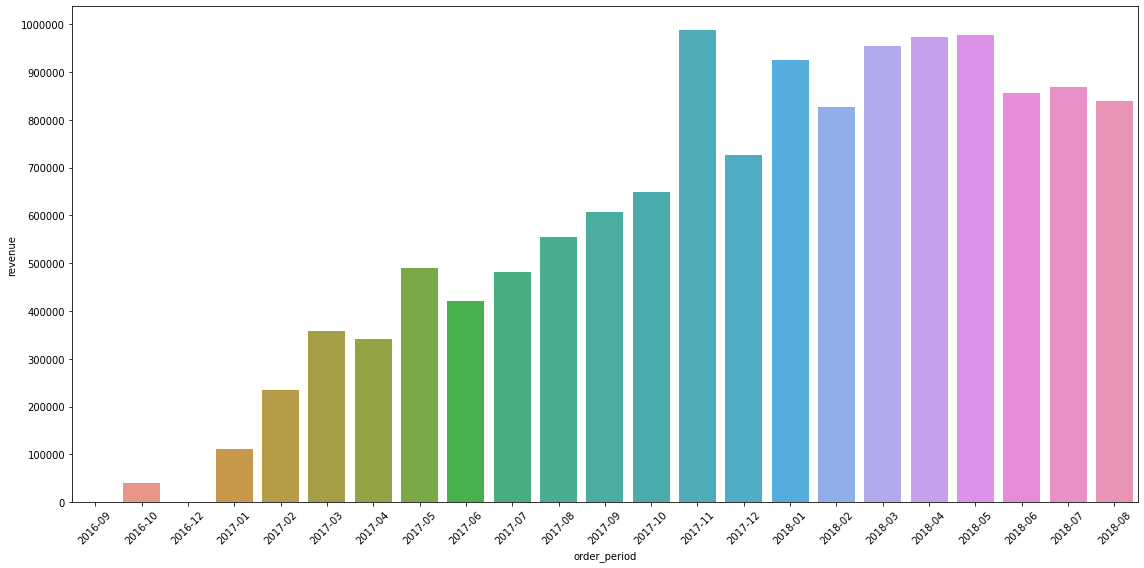

In [18]:
#Визуализируем выручку
plt.figure(figsize = (16, 8))
sns.barplot(data = df_revenue, x = 'order_period', y = 'revenue')
plt.yticks(np.linspace(0,1000000,11))
plt.ticklabel_format(style='plain',axis = 'y')
plt.xticks(rotation = 45)
plt.tight_layout()

2. Объём аудитории, которой продукт доставляет ценность, - количество уникальных клиентов, которые получили товар.

In [19]:
#Считаем количество уникальных пользователей за период retention
df_unique_customers = df_task_3.groupby('order_period', as_index = False).agg(unique_customers = ('customer_id', 'nunique'))
df_unique_customers

,order_period,unique_customers
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653
5,2017-03,2546
6,2017-04,2303
7,2017-05,3546
8,2017-06,3135
9,2017-07,3872


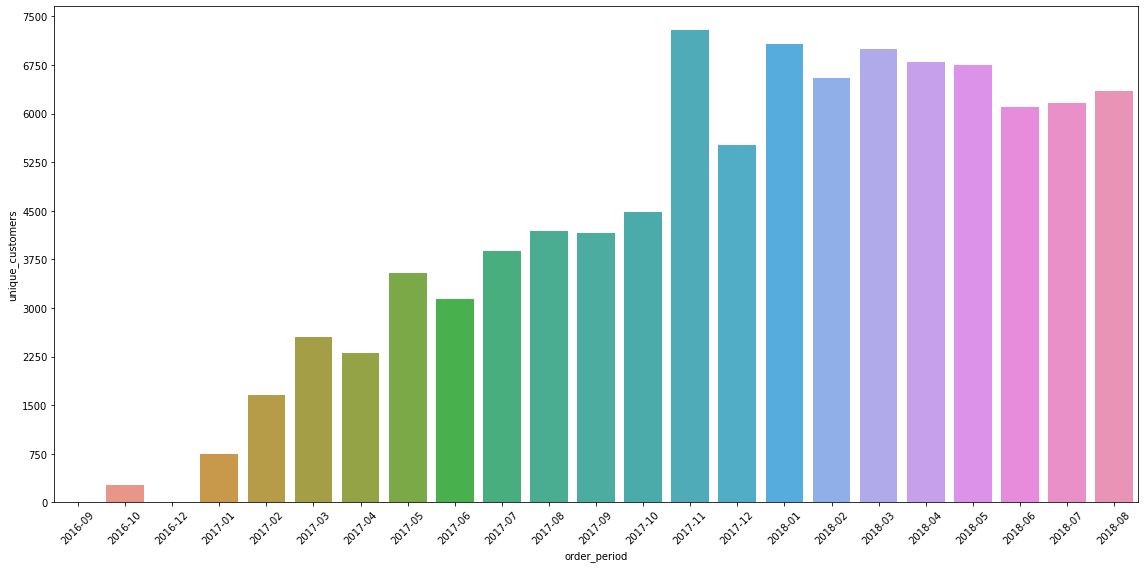

In [20]:
#Визуализируем количество уникальных пользователей за период
plt.figure(figsize = (16, 8))
sns.barplot(data = df_unique_customers, x = 'order_period', y = 'unique_customers')
plt.yticks(np.linspace(0,7500,11))
plt.ticklabel_format(style='plain',axis = 'y')
plt.xticks(rotation = 45)
plt.tight_layout()

3. Метрика, отражающая заинтересованность новых клиентов в продукте, - конверсия. То есть те пользователи, которые совершили целевое действие. Их количество мы могли наблюдать в нулевом периоде расчёта retention.

In [21]:
cohort_size.rename_axis('converse_users')

converse_users
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

4. Конверсия в повторный заказ. Здесь можно либо вернуться к помесячному retention и посмотреть на его динамику по месяцам. Или посмотреть на количество пользователей, совершивших 2 и более покупки, в сравнении с общей массой клиентов.

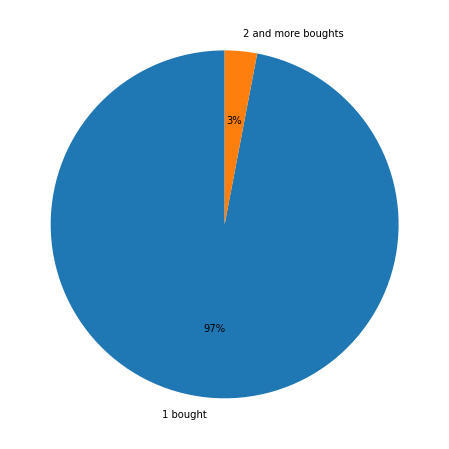

In [22]:
#Сравнение количества одиночных покупателей и повторно совершивших заказ
df_repeat_customers = df_task_3.groupby('customer_unique_id', as_index = False).agg(count_boughts = ('order_id', 'nunique'))\
                               .query('count_boughts > 1').shape[0]
df_single_customers = df_task_3.groupby('customer_unique_id', as_index = False).agg(count_boughts = ('order_id', 'nunique'))\
                               .query('count_boughts == 1').shape[0]

plt.figure(figsize = (8, 8))
sizes = [df_single_customers, df_repeat_customers]
labels = ['1 bought', '2 and more boughts']
plt.pie(sizes, labels = labels, autopct='%1.0f%%', startangle = 90)
plt.show()

Наглядно видно, что доля клиентов, совершивших повторный заказ, ничтожно мала. Необходимо работать над удержанием клиентов.

5. Метрика, отражающая денежное выражение вовлечённости клиента, - ARPPU (средний чек платящего клиента). Она покажет, насколько клиент, пользующийся сервисом, активно взаимодействует с продуктом и сколько принесёт нам дохода.

In [23]:
#Рассчитываем ARPPU
df_arppu = df_revenue.merge(df_unique_customers, how = 'left', on = 'order_period')
df_arppu['arppu'] = round((df_arppu['revenue'] / df_arppu['unique_customers']), 2)
df_arppu

,order_period,revenue,unique_customers,arppu
0,2016-09,134.97,1,134.97
1,2016-10,40325.11,265,152.17
2,2016-12,10.90,1,10.90
3,2017-01,111798.36,750,149.06
4,2017-02,234223.40,1653,141.70
5,2017-03,359198.85,2546,141.08
6,2017-04,340669.68,2303,147.92
7,2017-05,489338.25,3546,138.00
8,2017-06,421923.37,3135,134.58
9,2017-07,481604.52,3872,124.38


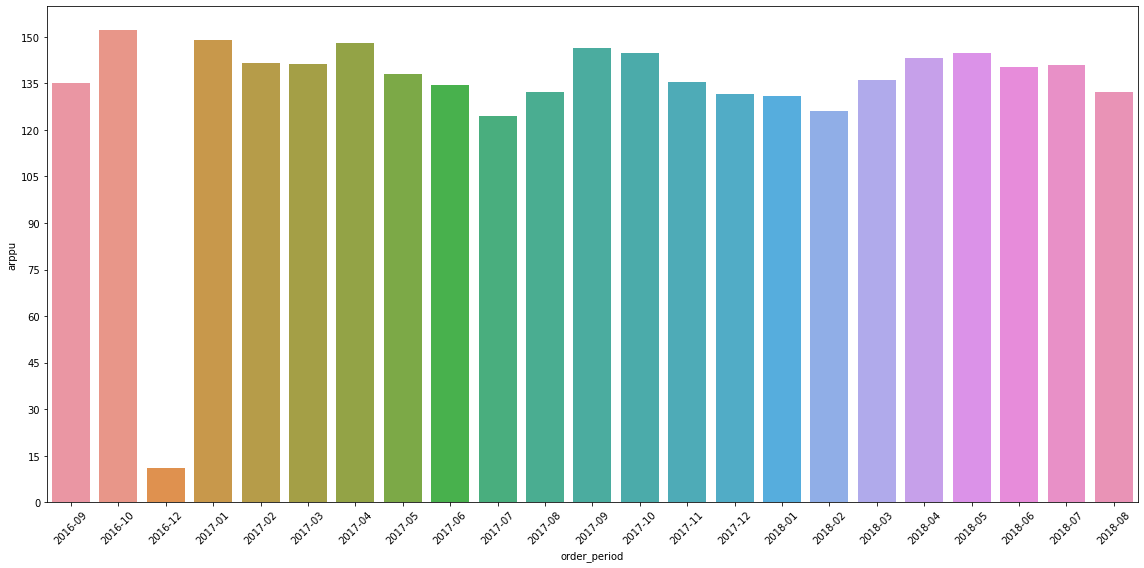

In [24]:
plt.figure(figsize = (16, 8))
sns.barplot(data = df_arppu, x = 'order_period', y = 'arppu')
plt.yticks(np.linspace(0, 150, 11))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 45)
plt.tight_layout()

После практически отсутствия покупок в декабре 2016, средний чек колеблется около 135.

# Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Совместно с командой сформулированы 3 гипотезы. По каждой гипотезе заполнены показатели по Ease, Confidence. Осталось заполнить Impact.

Для расчёта Impact были взяты данные за период с июня 2017 года. Конверсия в повторный заказ равна величине медианного retention 1-го месяца с первого этапа.

Для перевода метрики в Impact используется следующая шкала:

|Impact          |1     |2       |3        |4	     |5	        |6	        |7	        |8	         |9	           |10            |   
|----------------|:----:|:------:|:-------:|:-------:|:--------:|:---------:|:---------:|:----------:|:-----------:|:------------:|
|Значение метрики|0 - 50|51 - 150|151 - 350|351 - 750|751 - 1550|1551 - 3150|3151 - 6350|6351 - 12750|12751 - 25550|25551 - 51 150|

- 1 гипотеза:                                                       
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся ото всех отмен.

Impact - ? Confidence - 8 Ease - 6
- 2 гипотеза:
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Impact - ? Confidence - 10 Ease - 4
- 3 гипотеза:	
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

Impact - ? Confidence - 5 Ease - 9

ICE - ?

In [25]:
#Отфильтруем данные за период с 01.06.2017
task_4 = olist_orders.query('order_purchase_timestamp >= "2017-06-01"')

In [26]:
#Считаем метрику для импакта первой гипотезы.
task_4.query('order_status == "canceled"').order_id.count()

499

Согласно нашей шкале импакт первой гипотезы = 4, ICE 192.

In [27]:
#Считаем импакт второй гипотезы.
task_4['order_delivered_customer_date'] = task_4['order_delivered_customer_date'].dt.floor('D')
task_4['order_estimated_delivery_date'] = task_4['order_estimated_delivery_date'].dt.floor('D')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#Считаем количество заказов, прибывших с опозданием
late_orders = task_4.query('order_estimated_delivery_date < order_delivered_customer_date & order_status == "delivered"')\
                    .order_id.count()

In [29]:
#Применяем конверсию в повторные заказы
print(f'Метрика для импакта второй гипотезы: {late_orders * 0.0035}')

Метрика для импакта второй гипотезы: 21.3045


Согласно нашим данным импакт первой гипотезы равен 1, ICE 40.

In [30]:
#Исходя из гипотезы, можно подумать двояко: планируется ли конверсия в повторный заказ всех заказов или только доставленных.
#Рассчитаем оба варианта.
delivered_converse_repeat = task_4.query('order_status == "delivered"').order_id.nunique() * 0.0035
print(f'Метрика для импакта третьей гипотезы после конверсии в повторный заказ всех заказов: {task_4.order_id.nunique() * 0.0035}')
print(f'Метрика для импакта третьей гипотезы после конверсии в повторный заказ уже доставленных заказов: {delivered_converse_repeat}')

Метрика для импакта третьей гипотезы после конверсии в повторный заказ всех заказов: 307.111
Метрика для импакта третьей гипотезы после конверсии в повторный заказ уже доставленных заказов: 298.9455


В любом случае обе метрики соответствуют импакту 3 нашей шкалы, ICE 135.

Подводя итог, необходимо сделать выбор в пользу первой метрики. Она позволит нам избавиться сразу от всех отмен, что, 
естественно, отражается в более высоком ICE среди остальных гипотез 192. Данный факт подтверждает утверждение, что, как правило, лучше первоначально устранить баги в имеющимся продукте, прежде чем приступать к реализации иных гипотез. Сразу же после первой гипотезы можно приняться за проработку гипотезы второй с ICE 135, так как разница между ними в ICE относительно небольшая, по крайней мере, в сравнении с ICE третьей гипотезы 40.

# Задача 5. Сформулировать нужные метрики, на которые наша гипотеза должна повлиять.

В рамках задачи:
Сформулируем метрики, на которые должна повлиять выбранная гипотеза.
Сформулируем целевую, прокси и guardrail метрики.


Выбранная гипотеза должна повлиять на все метрики, сформулированные в задаче 3:
1. Выручка должна вырасти, так как отмены уйдут, и увеличится количество доставленных заказов, а, как следствие, и доход от них.
2. Количество уникальных клиентов, которые получили товар, как было уже сказано ранее, должно увеличиться.
3. Конверсия также увеличится, так как отменённые заказы сконвертируются.
4. Вовлечённость клиента в продолжение использования продукта вырастет однозначно, так как пользователи не будут сталкиваться с 
багом, который их отталкивал и вызывал негатив к продукту, что в конечном счёте увеличит лояльность покупателей.
5. ARPPU также увеличится, так как количество заказов вырастет, в том числе и среди уже имеющихся пользователей маркетплейса.

Одной из главных целевых метрик у нас будет являться увеличение выручки, так как увеличатся доходы за счёт возросшего количества доставленных клиентам товаров. 

Прокси метрикой для вышесказанного может являться увеличение количества заказов, что, по идее, должно повлечь за собой рост 
дохода, так как мы пофиксили баг с отменой, и конверсия в доставленные заказы должна увеличиться.

Барьерной метрикой может стать рост жалоб на долгий срок доставки товара или получение товара с браком. Например, при увеличении количества товаров, которые 
необходимо доставить, логистическая компания будет перегружена, и, как следствие, хуже справляться с доставкой товара
(путают товар, при отправлении его повреждают из-за спешки и т.д.).

# Задача 6. Подведение итогов проведённой работы и формулирование выводов с компанией.